###### Code created by Christopher Bell for Professor Lorena Barba's Aerodynamics and Hydrodynamics course at GWU.

# Vortex Lattice Method

### Basics of VLMs

Now that we have some experience with Panel Methods, let's look at another form of panel method-- the Vortex Lattice Method (VLM). VLMs were created as an extension of Prandtl's lifting line theory in order to more accurately resolve low aspect-ratio straight wings, swept wings, and delta wings. This is accomplished by allowing the vortices' strengths to vary in the chord wise and spanwise direction--instead of just spanwise. VLMs overlay horseshoe vortices over a planar wing. The Biot-Savard Law is then used to calculate the induced velocities. The general layout of these horseshoe vortices can be seen below
<img src='./VLM_resources/General_VLM.png'height '2'width '2'>

###### Image Credit: Bertin and Smith, Aerodynamics for Engineers, page 292.

This process is repeated for each individual panel and control point. All the control points are then summed to yield linear equations for the horshoe vortices' strengths. $\delta$ is used to indicate streamwise vortex strength and $\gamma$ is used to indicate cross-stream vortex strength. This is all done while still enforcing the same boundary condition from Panel methods. Do you remember it? Yep, the flow tangency condition. These vortex strengths are then used to get the total circulation around the lifting body. Using the circulation we can then find the lift.

### How are these panels and horseshoe vortices oriented?

The horseshoe vortices are typically placed at the $\frac{1}{4}$-chord point of each panel, while the control points should be placed at the $\frac{3}{4}$-chord point of each panel. This condition arises because of the relationship between circulation, $\Gamma$, and the freestream velocity, $U_\infty$. This relationship is given below as the circulation induces a velocity at the control point, $c$, with $r$ being the control point's distance from the vortex filament making up the horseshoe vortex:

\begin{equation}
U = \frac{\Gamma}{2\pi r}
%\label{eq:inducedvel}
\end{equation}

The orientation of a single panel with respect to the freestream can be seen in the image below.

<img src='./VLM_resources/control_point.png'height '12'width '12'>

###### Image Credit: Bertin and Smith, Aerodynamics for Engineers, page 293.

Next, forcing the flow to be parallel to the surface at every control point we get:

\begin{equation}
\alpha \approx \sin \alpha = \frac{U}{U_\infty} = \frac{\Gamma}{2\pi r U_\infty}
%\label{eq:inducedfreestream}
\end{equation}

Now we can use the Kutta-Joukowski theorm, $L = \rho_\infty U_\infty \Gamma$, and the previous equation to obtain

\begin{equation}
\pi \rho_\infty {U_\infty}^2 c \frac{\Gamma}{2\pi r U_\infty} = \rho_\infty U_\infty \Gamma
%\label{eq:kutta_induced}
\end{equation}

Now, we solve for $r$ to find where the control point should be located relative to the horseshoe vortex for each panel. This yields $r = \frac{c}{2}$ which since the vortex is located at the $\frac{1}{4}$-chord means that the control point should be placed at the $\frac{3}{4}$-chord point.

The panel themselves are also typically aligned with the wing's sweep angle as seen in the previous figure.


   It is also important to decide how to treat the wake region with the tails of the horseshoe vortices going to infinity. In a fully 3D code, the panels would be located on the mean camber surface of the wing which would yield curved trailing vortices paths. For simplicitly, this code will not be treating the airfoil in this way because past work has demonstrated the ability for straight line trailing vortices to be accurate. We also need to decided which axis to align the trialing vortices with--the aircraft centerline or the freestream. We will be using the aircraft centerline.

## Warning!! Lots of Math Ahead

### Induced Velocities

Now, we need to derive how we will calculate the induced velocities on the wing from the horseshoe vortices. The defining geometry for this derivation is below. Segment $\overrightarrow{AB}$ is a vorticity vector and point $C$, is any point in space.

<img src='./VLM_resources/Vortex_Notation.png'height '12'width '12'>

###### Image Credit: Bertin and Smith, Aerodynamics for Engineers, page 294.

From undergraduate aerodynamics, we know that the induced velocity from a vortex is given by the Biot-Savart Law:

\begin{equation}
\overrightarrow{dV} = \frac{\Gamma_n \left(\overrightarrow{dl} \times \overrightarrow{r}\right)}{4\pi r^3}
%\label{eq:BiotSavart}
\end{equation}

When applied to our specific geometry it simplifies to:

\begin{equation}
dV = \frac{\Gamma_n \sin \theta dl}{4\pi r^2}
%\label{eq:specificBSL}
\end{equation}

Now, we can use this relation to calculate the induced velocites from the horseshoe vortices. Before we begin though, let's try and make our derivation a little easier. If we use the nomenclature in the image below, we can separate the horseshoe vortex into 3 separate vortices--one vortex stretching from $A$ to $\infty$, one vortex stretching from $B$ to $\infty$, and one vortex from $A$ to $B$.

<img src='./VLM_resources/Single_horseshoe_vortex.png'height '12'width '12'>

###### Image Credit: Bertin and Smith, Aerodynamics for Engineers, page 295.


Using the Biot-Savart Law, we can now calculate the induced velocity at some point $c$ whose distance from $\overrightarrow{AB}$ is $r_p$.

\begin{equation}
V = \frac{\Gamma_n}{4\pi r_p}\int_{\theta_1}^{\theta_2} \sin \theta d \theta = \frac{\Gamma_n}{4\pi r_p}\left(\cos \theta_1 - \cos \theta_2\right)
%\label{eq:BSL_genpoint}
\end{equation}

This simplifies further when $r_p$ is extended to $\infty$:

\begin{equation}
V = \frac{\Gamma_n}{4\pi r_p}\left(\cos\left(0\right) - \cos\left(\pi\right)\right) = \frac{\Gamma_n}{2\pi r_p}
%\label{eq:BSL_infty}
\end{equation}

Now we want to apply this law more generally, so first we are going to define some more general variables and relationships according to the below figure:

<img src='./VLM_resources/vector_elements.png'height '12'width '12'>

###### Image Credit: Bertin and Smith, Aerodynamics for Engineers, page 297.

\begin{equation}
\overrightarrow{r_0} = \overrightarrow{AB}
%\label{eq:r0}
\end{equation}

\begin{equation}
\overrightarrow{r_1} = \overrightarrow{AC}
%\label{eq:r1}
\end{equation}

\begin{equation}
\overrightarrow{r_2} = \overrightarrow{BC}
%\label{eq:r2}
\end{equation}

\begin{equation}
r_p = \frac{\left|\overrightarrow{r_1} \times \overrightarrow{r_2}\right|}{r_0}
%\label{eq:rp}
\end{equation}

\begin{equation}
\cos \theta_1 = \frac{\overrightarrow{r_0} \cdot \overrightarrow{r_1}}{r_0 r_1}
%\label{eq:cos1}
\end{equation}

\begin{equation}
\cos \theta_2 = \frac{\overrightarrow{r_0} \cdot \overrightarrow{r_2}}{r_0 r_2}
%\label{eq:cos2}
\end{equation}

Now we can use the above relations with Biot-Savard Law to obtain the induced velocity in terms of the distance vectors rather than angles:

\begin{equation}
\overrightarrow{V} = \frac{\Gamma_n}{4\pi}\frac{\vec{r_1} \times \vec{r_2}}{\left| \vec{r_1} \times \vec{r_2} \right|^2} \left[ \vec{r_0} \cdot \left(\frac{\vec{r_1}}{r_1} - \frac{\vec{r_2}}{r_2}\right) \right]
%\label{eq:vel_dist}
\end{equation}

The direction of the induced velocity is given by:

\begin{equation}
\frac{\vec{r_1} \times \vec{r_2}}{\left| \vec{r_1} \times \vec{r_2} \right|}
%\label{eq:vel_dir}
\end{equation}

Now we can use velocity in terms of the distance vectors to calculate the induced velocity at some generalized panel, n! First, let's start with vortex segment $\overrightarrow{AB}$ which was defined earlier. For this segment, $r_0$, $r_1$, and $r_2$ become:

\begin{equation}
\vec{r_0} = \overrightarrow{AB} = \left(x_{2n} - x_{1n} \right)\hat{i} + \left(y_{2n} - y_{1n} \right)\hat{j} + \left(z_{2n} - z_{1n} \right)\hat{k}
%\label{eq:r0_AB}
\end{equation}

\begin{equation}
\overrightarrow{r_1} = \left(x - x_{1n} \right)\hat{i} + \left(y - y_{1n} \right)\hat{j} + \left(z - z_{1n} \right)\hat{k}
%\label{eq:r1_AB}
\end{equation}

\begin{equation}
\overrightarrow{r_2} = \left(x -x_{2n} \right)\hat{i} + \left(y -y_{2n} \right)\hat{j} + \left(z - z_{2n} \right)\hat{k}
%\label{eq:r2_AB}
\end{equation}

Applying these values to the velocity in terms of the distance vectors we get:
\begin{equation}
\overrightarrow{V_{AB}} = \frac{\Gamma_n}{4\pi}\left[Fac1_{AB} \right] \left[Fac2_{AB} \right]
%\label{eq:AB_portion}
\end{equation}

In the above equation the last two factors are just place holders for the last two factors from the equation it falls out of applied to $\overrightarrow{AB}$. These two factors expand to:

\begin{equation}
\left[Fac1_{AB} \right] = \frac{\vec{r_1} \times \vec{r_2}}{\left|\vec{r_1} \times \vec{r_2} \right|^2} =\\ \frac{\left[\left(y - y_{1n}\right)\left(z - z_{2n}\right) - \left(y -y_{2n}\right)\left(z - z_{1n}\right)\right]\hat{i}
 - \left[\left(x - x_{1n}\right)\left(z - z_{2n}\right) - \left(x -x_{2n}\right)\left(z - z_{1n}\right)\right]\hat{j}
 + \left[\left(x - x_{1n}\right)\left(y - y_{2n}\right) - \left(x -x_{2n}\right)\left(y - y_{1n}\right)\right]\hat{k}}
 {\left[\left(y - y_{1n}\right)\left(z - z_{2n}\right) - \left(y -y_{2n}\right)\left(z - z_{1n}\right)\right]^2
 - \left[\left(x - x_{1n}\right)\left(z - z_{2n}\right) - \left(x -x_{2n}\right)\left(z - z_{1n}\right)\right]^2 +
 \left[\left(x - x_{1n}\right)\left(y - y_{2n}\right) - \left(x -x_{2n}\right)\left(y - y_{1n}\right)\right]^2}
%\label{eq:fac1AB}
\end{equation}

\begin{equation}
\left[Fac2_{AB} \right] = \left(\vec{r_0} \cdot \frac{\vec{r_1}}{r_1} - \vec{r_0} \cdot \frac{\vec{r_2}}{r_2} \right) = \frac{\left[\left(x_{2n} - x_{1n}\right)\left(x -x_{1n}\right) 
+ \left(y_{2n} - y_{1n}\right)\left(y - y_{1n}\right) 
+ \left(z_{2n} - z_{1n}\right)\left(z - z_{1n}\right)\right]}
{\sqrt{\left(x - x_{1n}\right)^2 + \left(y - y_{1n}\right)^2 + \left(z - z_{1n}\right)^2}} 
- \frac{\left[\left(x_{2n} - x_{1n}\right)\left(x -x_{2n}\right) 
+ \left(y_{2n} - y_{1n}\right)\left(y - y_{2n}\right) 
+ \left(z_{2n} - z_{1n}\right)\left(z - z_{2n}\right)\right]}
{\sqrt{\left(x - x_{2n}\right)^2 + \left(y - y_{2n}\right)^2 + \left(z - z_{2n}\right)^2}}
%\label(eq:fac2AB}
\end{equation}

Now we follow the same process for vortex segment $\overrightarrow{AD}$:

\begin{equation}
\vec{r_0} = \overrightarrow{DA} = \left(x_{1n} - x_{3n} \right)\hat{i} + 
%\label{eq:r0_DA}
\end{equation}

\begin{equation}
\overrightarrow{r_1} = \left(x - x_{3n} \right)\hat{i} + \left(y - y_{1n} \right)\hat{j} + \left(z - z_{1n} \right)\hat{k}
%\label{eq:r1_DA}
\end{equation}

\begin{equation}
\overrightarrow{r_2} = \left(x -x_{1n} \right)\hat{i} + \left(y -y_{1n} \right)\hat{j} + \left(z - z_{1n} \right)\hat{k}
%\label{eq:r2_DA}
\end{equation}

\begin{equation}
\overrightarrow{V_{AD}} = \frac{\Gamma_n}{4\pi}\left[Fac1_{AD} \right] \left[Fac2_{AD} \right]
%\label{eq:AB_portion}
\end{equation}

\begin{equation}
\left[ Fac1_{AD}\right] = \frac{\left(z -z_{1n}\right)\hat{j} + \left(y_{1n} - y\right)\hat{k}}{\left[\left(z - z_{1n}\right)^2 + \left(y_{1n} - y\right)^2\right] \left(x_{3n} - x_{1n}\right)}
%\label{eq:Fac1_AD}
\end{equation}

\begin{equation}
\left[Fac2_{AD}\right] = \left(x_{3n} - x_{1n}\right)\left[\frac{x_{3n} - x}{\sqrt{\left(x - x_{3n}\right)^2 + \left(y -y_{1n}\right)^2 + \left(z - z_{1n}\right)^2}} + \frac{x - x_{1n}}{\sqrt{\left(x - x_{1n}\right)^2 + \left(y -y_{1n}\right)^2 + \left(z - z_{1n}\right)^2}}\right]
%\label{eq:Fac2_AD}
\end{equation}

The two equations directly above are both formulated for a discrete location of $D$, but in VLMs we want $D$ to go to $\infty$. So, we allow $D$ to go to $\infty$ by setting $x_3 = \infty$. This yields the final equation for the induced velocity from this vortex segment of:

\begin{equation}
\overrightarrow{V_{A\infty}} = \frac{\Gamma_n}{4\pi}\left[\frac{\left(z -z_{1n}\right)\hat{j} + \left(y_{1n} - y\right)\hat{k}}{\left(z - z_{1n}\right)^2 + \left(y_{1n} - y\right)^2}\right]\left[1.0 + \frac{x - x_{1n}}{\sqrt{\left(x - x_{1n}\right)^2 + \left(y -y_{1n}\right)^2 + \left(z - z_{1n}\right)^2}}\right]
%\label{eq:Ainfty_portion}
\end{equation}

Following the same process, we can find the induced velocity over the other infinite leg of the horshoe vortex.

\begin{equation}
\overrightarrow{V_{B\infty}} = \frac{-\Gamma_n}{4\pi}\left[\frac{\left(z -z_{2n}\right)\hat{j} + \left(y_{2n} - y\right)\hat{k}}{\left(z - z_{2n}\right)^2 + \left(y_{2n} - y\right)^2}\right]\left[1.0 + \frac{x - x_{2n}}{\sqrt{\left(x - x_{2n}\right)^2 + \left(y -y_{2n}\right)^2 + \left(z - z_{2n}\right)^2}}\right]
%\label{eq:Binfty_portion}
\end{equation}

Some quick housekeeping of variables, $\left(x_m,y_m,z_m\right)$ will designate the coordinates of the mth-panel's control point and the induced velocity at the mth-panel's control point by panel n is $\overrightarrow{V_{m,n}}$ 

Now we can find the induced velocity at any control point from any panel by summing the 3 individual vortex parts and solving the linear equation below for the total induced velocity. 

\begin{equation}
\overrightarrow{V_{m,n}} = \overrightarrow{C_{m,n}}\Gamma_n
%\label{eq:lin_syst}
\end{equation}

The benefit of this equation being linear is to find the total induced velocity at control point m simply requires us to sum the individual component from each panel. This reduces the last equation to:

$$\overrightarrow{V} = \sum_{n=1}^{2N} \overrightarrow{C_{m,n}} \Gamma_n$$


where we sum to $2N$ because we need to account for both the left (port) and right (starboard) wings.

### Boundary Conditions

That takes care of the induced velocity calculations, but did you notice that we have a problem? We don't have the strengths of the vortices! However, we can find the strengths by using the same boundary condition we did in our basic panel method. We set the flow to be tangent to the wing at every control point. For an arbitraritly shaped wing this boundary condition is satisfied by the equation:

\begin{equation}
\begin{split}
-u_m \sin \delta \cos & \phi - v_m \cos \delta sin \phi + w_m \cos \phi \cos \delta\\  & + U_{\infty}\sin \left(\alpha - \delta\right) \cos \phi = 0
\end{split}
%\label{eq:gen_BCs}
\end{equation}

Where $\phi$ is the dihedral angle, $\delta$ is the mean camber at the control
point, and $\alpha$ is the angle of attack of the airfoil. We can also calculate $\delta$:

\begin{equation}
\delta = \tan^{-1} \left(\frac{dz}{dx}\right)_m
%\label{eq:delta}
\end{equation}

If we assume that the mean camber line is small and the angle of attack is small the boundary condition equation simplifies to:

\begin{equation}
w_m - v_m \tan \phi + U_{\infty}\left[\alpha - \left(\frac{dz}{dx}\right)_m\right] = 0
%\label{eq:simp_BCs}
\end{equation}

## Basic Validation Example

Our validation example will be a simple 4 panel planar wing as found in Bertin and Smith's textbook. Following this example, will allow for a basic code to be create and checked before moving on to more complex examples which will be checked with experimental data. The main simplifying assumptions for the planar wing is that $z_{1n} = z_{2n} = 0$ and $z_m = 0$ for the control points.

The wing will have an aspect ratio of 5, no taper, uncambered, and constant sweep of $45^{\circ}$. The chord is $0.2b$ and spans $0.5b$. An image of the wing in this problem is below.

<img src='./VLM_resources/validation_image.png'height '12'width '12'>

###### Image Credit: Bertin and Smith, Aerodynamics for Engineers, page 301.

Because we have a planar wing our main equations simplfy somewhat:

\begin{equation}
\overrightarrow{V_{AB}} = \frac{\Gamma_n}{4\pi} \frac{\hat{k}}{\left(x_m - x_{1n}\right)\left(y_m - y_{2n}\right) - \left(x_m - x_{2n}\right) \left(y_m - y_{1n}\right)} \left[ \frac{\left(x_{2n} - x_{1n}\right) \left(x_m - x_{1n}\right) + \left( y_{2n} - y_{1n}\right)\left(y_m - y_{1n}\right)}{\sqrt{\left(x_m - x_{1n}\right)^2 + \left(y_m - y_{1n}\right)^2}} - \frac{\left(x_{2n} - x_{1n}\right) \left(x_m - x_{2n}\right) + \left( y_{2n} - y_{1n}\right)\left(y_m - y_{2n}\right)}{\sqrt{\left(x_m - x_{2n}\right)^2 + \left(y_m - y_{2n}\right)^2}}\right]
%\label{eq:Planar_AB}
\end{equation}
 
\begin{equation}
\overrightarrow{V_{A\infty}} = \frac{\Gamma_n}{4\pi} \frac{\hat{k}}{y_{1n} - y_m} \left[1.0 + \frac{x_m - x_{1n}}{\sqrt{\left(x_m - x_{1n}\right)^2 + \left(y_m - y_{1n}\right)^2}} \right]
%\label{eq:Planar_Ainfty}
\end{equation}

\begin{equation}
\overrightarrow{V_{B\infty}} = \frac{\Gamma_n}{4\pi} \frac{\hat{k}}{y_{2n} - y_m} \left[1.0 + \frac{x_m - x_{2n}}{\sqrt{\left(x_m - x_{2n}\right)^2 + \left(y_m - y_{2n}\right)^2}} \right]
%\label{eq:Planar_Binfty}
\end{equation}

Since all the induced velocities in the previous 3 equations are in the z-direction we can convert this to one equation. Also, because the induced velocity is in the z-direction we will call it the downwash, $w$.

\begin{equation}
w_{m,n} = \frac{\Gamma_n}{4\pi} \left[\frac{\hat{1}}{\left(x_m - x_{1n}\right)\left(y_m - y_{2n}\right) - \left(x_m - x_{2n}\right) \left(y_m - y_{1n}\right)} \left[ \frac{\left(x_{2n} - x_{1n}\right) \left(x_m - x_{1n}\right) + \left( y_{2n} - y_{1n}\right)\left(y_m - y_{1n}\right)}{\sqrt{\left(x_m - x_{1n}\right)^2 + \left(y_m - y_{1n}\right)^2}} - \frac{\left(x_{2n} - x_{1n}\right) \left(x_m - x_{2n}\right) + \left( y_{2n} - y_{1n}\right)\left(y_m - y_{2n}\right)}{\sqrt{\left(x_m - x_{2n}\right)^2 + \left(y_m - y_{2n}\right)^2}}\right] + \frac{\hat{k}}{y_{1n} - y_m} \left[1.0 + \frac{x_m - x_{1n}}{\sqrt{\left(x_m - x_{1n}\right)^2 + \left(y_m - y_{1n}\right)^2}} \right] - \frac{\hat{k}}{y_{2n} - y_m} \left[1.0 + \frac{x_m - x_{2n}}{\sqrt{\left(x_m - x_{2n}\right)^2 + \left(y_m - y_{2n}\right)^2}} \right]\right]
%\label{eq:downwash}
\end{equation}

Now we just need to sum the last equation for all the panels to get the total effect. 

The Planar wing also has a minor effect on Boundary Conditions.

\begin{equation}
w_m = -U_{\infty} \alpha
%\label{eq:downwash_BC}
\end{equation}

Finally, let's get coding...

In [2]:
import numpy as np
import math
import scipy as sp
from matplotlib import pyplot as plt

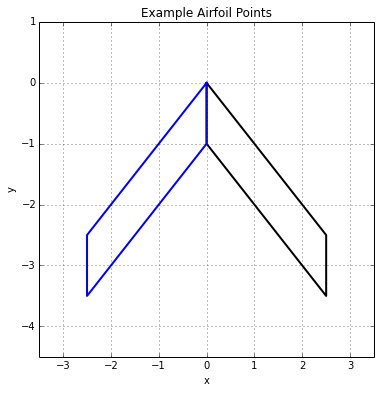

In [3]:
chord = 1.0               #meters
b = 5.0                   #Span
AR = b/chord
val_x, val_y = 0.1, 0.2

#Starboard Wing
with open ('./VLM_resources/VLM_Example_Airfoil.txt') as file_name:
    num_star, x_star, y_star = np.loadtxt(file_name, dtype=float,\
        delimiter='\t', unpack=True)

x_min_star, x_max_star = np.min(np.abs(x_star)), np.max(np.abs(x_star))
y_min_star, y_max_star = np.min(np.abs(y_star)), np.max(np.abs(y_star))
x_start_star, x_end_star = x_min_star-val_x*(x_max_star-x_min_star),\
    x_max_star+val_x*(x_max_star-x_min_star)
y_start_star, y_end_star = y_min_star-val_y*(y_max_star-y_min_star),\
    y_max_star+val_y*(y_max_star-y_min_star)

#Port Wing
with open ('./VLM_resources/VLM_Example_Airfoil.txt') as file_name:
    num_port, x_port, y_port = np.loadtxt(file_name, dtype=float,\
        delimiter='\t', unpack=True)

x_port = np.dot(x_port,-1)
x_min_port, x_max_port = np.min(np.abs(x_port)), np.max(np.abs(x_port))
y_min_port, y_max_port = np.min(np.abs(y_port)), np.max(np.abs(y_port))
x_start_port, x_end_port = x_min_port-val_x*(x_max_port-x_min_port),\
    x_max_port+val_x*(x_max_port-x_min_port)
y_start_port, y_end_port = y_min_port-val_y*(y_max_port-y_min_port),\
    y_max_port+val_y*(y_max_port-y_min_port)

%matplotlib inline
size = 6
plt.figure(figsize=(size,size))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-(x_max_port+1.0), x_max_star+1.0)
plt.ylim(-(y_max_star+1.0), 1.0)
plt.title('Example Airfoil Points')
plt.plot(x_star, y_star, color='k', linestyle='-',linewidth=2)
plt.plot(x_port, y_port, color='b', linestyle='-', linewidth=2);

Now that we have imported the entire wing we need to divide the Wing up into panels. To simplfy the code we will be calculating the circulation for each panel on the starboard wing due to the panels on both the starboard and port wings. instead of repeating this process on the port side we simply make the assumption that it produces equal amounts of lift as the starboard wing.

In [5]:
class Panel:
    """Contains information related to a panel"""
    def __init__(self, xa, ya, xb, yb, xc, yc, xd, yd, chord, i, N_panels):
        """Initializes the panel
        
        Params:
        --------
        xa, ya  float, coordinates of the left LE point of a panel
        xb, yb  float, coordinates of the right LE point of a panel
        xc, yc  float, coordinates of the right TE point of a panel
        xd, yd  float, coordinates of the left TE point of a panel
        """
        
        #panel corners
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        self.xc, self.yc = xc, yc
        self.xd, self.yd = xd, yd
        self.chord = chord
        
        #placing control point at 3/4 chord
        self.x_control = (self.xa+self.xb)/2
        #self.y_control = ya - (chord*(3.0/4.0))
        self.y_control = ya - ((math.fabs(self.yb-self.ya)/2.0)+(3.0/4.0)\
            *self.chord)
        
        #Left Front of Horseshoe points   
        #front of horseshoe x coord
        self.x1n = xa
        #front of horseshoe y coord
        self.y1n = ya - (chord*(1.0/4.0))
        
        #Right Front of Horshoe points
        self.x2n = xb
        self.y2n = yb - (chord*(1.0/4.0))
        
        #arrays of panel corners
        self.x_square = [self.xa, self.xb, self.xc, self.xd]
        self.y_square = [self.ya, self.yb, self.yc, self.yd]
        
        self.Gamma = 0.0 #circulation

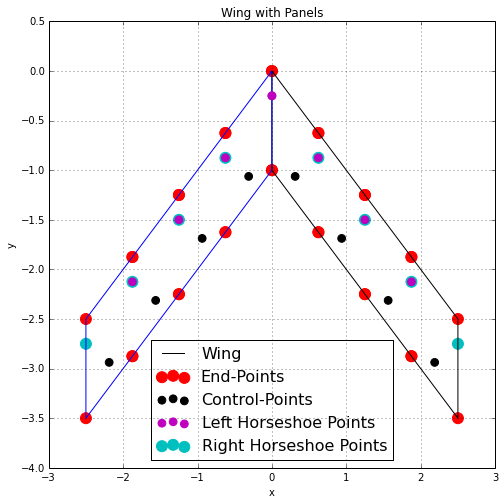

In [6]:
N_panels = 8  #Total Number of Panels
#starboard Wing
x_ends1_star = np.linspace(0, x_max_star, (N_panels/2) + 1)
y_ends1_star = np.linspace(0, -(x_max_star-x_min_star), (N_panels/2) + 1)
x_ends2_star = x_ends1_star.copy()
y_ends2_star = y_ends1_star.copy() - 1

panels_star = np.empty(N_panels/2, dtype=object)
for i in xrange(N_panels/2):
    panels_star[i] = Panel(x_ends1_star[i], y_ends1_star[i], x_ends1_star[i+1],\
        y_ends1_star[i+1], x_ends2_star[i], y_ends2_star[i], x_ends2_star[i+1],\
        y_ends2_star[i+1], chord, i, N_panels/2)

#Port Wing
x_ends1_port = np.linspace(0, -x_max_port, (N_panels/2) + 1)
y_ends1_port = np.linspace(0, -(x_max_port-x_min_port), (N_panels/2) + 1)
x_ends2_port = x_ends1_port.copy()
y_ends2_port = y_ends1_port.copy() - 1

panels_port = np.empty(N_panels/2, dtype=object)
for i in xrange(N_panels/2):
    panels_port[i] = Panel(x_ends1_port[i], y_ends1_port[i], x_ends1_port[i+1],\
        y_ends1_port[i+1], x_ends2_port[i], y_ends2_port[i], x_ends2_port[i+1],\
        y_ends2_port[i+1], chord, i, N_panels/2)    
   
%matplotlib inline
size = 8
plt.figure(figsize=(size,size))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
#plt.xlim(x_min-0.5,x_max+0.5)
#plt.ylim(y_min-0.5,y_max+0.5)
plt.plot(x_star, y_star, color='k', linestyle='-', linewidth=1, label='Wing')
plt.plot(x_port, y_port, color='b', linestyle='-', linewidth=1, label="")
plt.scatter([p.x_square for p in panels_star],[p.y_square for p in panels_star],\
    color='r', s=120, label="End-Points")
plt.scatter([p.x_square for p in panels_port],[p.y_square for p in panels_port],\
    color='r', s=120, label="")
plt.scatter([p.x_control for p in panels_star],[p.y_control for p in panels_star],\
    color='k',s=60, label="Control-Points")
plt.scatter([p.x_control for p in panels_port],[p.y_control for p in panels_port],\
    color='k',s=60, label="")
plt.scatter([p.x1n for p in panels_star],[p.y1n for p in panels_star],\
    color='m', s=60, zorder=3, label="Left Horseshoe Points")
plt.scatter([p.x1n for p in panels_port],[p.y1n for p in panels_port],\
    color='m', s=60, zorder=4, label="")
plt.scatter([p.x2n for p in panels_star],[p.y2n for p in panels_star],\
    color='c', s=120, zorder=1, label="Right Horseshoe Points")
plt.scatter([p.x2n for p in panels_port],[p.y2n for p in panels_port],\
    color='c', s=120, zorder=2, label="")
plt.legend(loc='best', prop={'size':16})
plt.title('Wing with Panels');

In [7]:
#Defining arrays of control and horseshoe points
y1ns_star = [p.x1n for p in panels_star]
x1ns_star = np.abs([p.y1n for p in panels_star])
y2ns_star = [p.x2n for p in panels_star]
x2ns_star = np.abs([p.y2n for p in panels_star])
ym_star = [p.x_control for p in panels_star]
xm_star = np.abs([p.y_control for p in panels_star])

y1ns_port = [p.x1n for p in panels_port]
x1ns_port = np.abs([p.y1n for p in panels_port])
y2ns_port = [p.x2n for p in panels_port]
x2ns_port = np.abs([p.y2n for p in panels_port])
ym_port = [p.x_control for p in panels_port]
xm_port = np.abs([p.y_control for p in panels_port])

In [8]:
def downwash(x1n, x2n, y1n, y2n, xm, ym, b):
    """Sets the Horseshoe Vortex Parameters

    Params:
    --------
    Gamma     float, circulation strength
    N_panels  float, number of panels
    x1n, y1n  coordinates of left front of horseshoe
    x2n, y2n  coordinates of right front of horseshoe
    x_m, y_m  control point coordinates
    """

    #m panel influence calculated on
    #n panel influence calculated from

    w = (((1.0/(((xm - x1n)*(ym - y2n)) - ((xm - x2n)*(ym - y1n)))) *\
        (((((x2n - x1n)*(xm - x1n)) + ((y2n - y1n)*(ym - y1n)))/\
        (math.sqrt((xm - x1n)**2 + (ym - y1n)**2)))\
        - ((((x2n - x1n)*(xm - x2n) + (y2n - y1n)*(ym - y2n)))/\
        (math.sqrt((xm - x2n)**2 + (ym - y2n)**2)))) +\
        (((1.0)/(y1n - ym))*(1.0 + ((xm - x1n)/(math.sqrt((xm - x1n)**2\
        + (ym - y1n)**2))))) - (((1.0)/(y2n - ym)) *(1.0 + ((xm -x2n)/\
        (math.sqrt((xm - x2n)**2 + (ym - y2n)**2))))))) * b
    
    return w

In [9]:
w_star = np.empty((N_panels/2,N_panels/2), dtype=float)
w_port = np.empty((N_panels/2,N_panels/2), dtype=float)
for m in range(0,N_panels/2):
    for n in range(0,N_panels/2):
        w_star[m,n] = downwash(x1ns_star[n], x2ns_star[n], y1ns_star[n],\
            y2ns_star[n], xm_star[m], ym_star[m], b)
        w_port[m,n] = -downwash(x1ns_port[n], x2ns_port[n], y1ns_port[n],\
            y2ns_port[n], xm_port[m], ym_star[m], b)

Now we add the two downwash terms as the circulation for each starboard panel and its mirror will be equal. So in this case, with only 4 panels we have 4 unknown circulations.

In [10]:
w = w_star + w_port
print w

[[-53.00368589  13.34368912   1.66435054   0.64336392]
 [ 23.8317548  -70.34449257  11.78361069   1.32593639]
 [  5.42715647  20.94010013 -71.14109518  11.51112481]
 [  2.49422268   4.36257137  20.50693616 -71.33508627]]


What makes this problem simpler is that we have a planar wing with no dihedral, so the downwash contributions from each panel must be equal.

In [11]:
#Build RHS matrix
M = 0.6 #mach
u_infty = 340.29 * M
alpha = 5.0*(math.pi/180) #radians
RHS = np.zeros(N_panels/2, dtype=float) 
for i in range(0,N_panels/2):
    RHS[i] = -4.0*math.pi*b*u_infty*alpha

In [13]:
Gamma = np.linalg.solve(w,RHS)
rho = .4135     #kg/m3
q_infty = 0.5*rho*u_infty**2
S = b*chord    #wing area
delta_y = y2ns_star[0]
L_numerical = 2.0*rho*u_infty*sum(np.dot(Gamma,delta_y))
L_book = rho*u_infty**2*b**2*math.pi*alpha*.1096
C_L_numerical = L_numerical/(q_infty*S)
C_L_book = 1.096*math.pi*alpha

Now let's print the values and compare to the book...

In [14]:
print "Our Calculated Lift is %f, the books calculated L is %f" % (L_numerical, L_book)
print "Our Calculated C_L is %f, the books calculated C_L is %f" % (C_L_numerical, C_L_book)

Our Calculated Lift is 12952.547129, the books calculated L is 12948.641162
Our Calculated C_L is 0.300565, the books calculated C_L is 0.300475


The values agree! It looks like our code is working now we can have some fun with it. First, let's turn our code into a function so it's easier to work with. Then, we can add some more panels and see what happens.

In [15]:
def VLM(N_Panels, x_star, y_star, x_port, y_port, M, AoA, b, chord):
    """Uses the Vortex Lattice Method to Calculate the Lift over a flat
    constant sweep and zero taper wing
    
    Params:
    -------
    N_Panels          float, total number of desired panels
    x_star, y_star    1D array of floats, x and y coordinates for starboard 
                        side of wing
    x_port, y_port    1D array of floats, x and y coordinates for port 
                        side of wing
    M                 float, mach number
    AoA               float, angle of attack in degrees
    b                 float, span of the airfoil
    chord             float, chord of the airfoil
    
    Returns:
    -------
    L        float, Total lift for the airfoil
    C_L      float, Coefficient of Lift for the airfoil
    """
    
    #Defining special starboard points
    x_min_star = np.min(np.abs(x_star)) 
    x_max_star = np.max(np.abs(x_star))
    y_min_star = np.min(np.abs(y_star))
    y_max_star = np.max(np.abs(y_star))
    x_start_star = x_min_star-val_x*(x_max_star-x_min_star)
    x_end_star = x_max_star+val_x*(x_max_star-x_min_star)
    y_start_star = y_min_star-val_y*(y_max_star-y_min_star)
    y_end_star = y_max_star+val_y*(y_max_star-y_min_star)

    #Defining Special Port Points
    x_min_port = np.min(np.abs(x_port))
    x_max_port = np.max(np.abs(x_port))
    y_min_port = np.min(np.abs(y_port))
    y_max_port = np.max(np.abs(y_port))
    x_start_port = x_min_port-val_x*(x_max_port-x_min_port)
    x_end_port = x_max_port+val_x*(x_max_port-x_min_port)
    y_start_port = y_min_port-val_y*(y_max_port-y_min_port)
    y_end_port = y_max_port+val_y*(y_max_port-y_min_port)
    
    #Starboard Wing Point Definitions
    x_ends1_star = np.linspace(0, x_max_star, (N_panels/2) + 1)
    y_ends1_star = np.linspace(0, -(x_max_star-x_min_star), (N_panels/2) + 1)
    x_ends2_star = x_ends1_star.copy()
    y_ends2_star = y_ends1_star.copy() - 1

    #Defining Starboard Panels
    panels_star = np.empty(N_panels/2, dtype=object)
    for i in xrange(N_panels/2):
        panels_star[i] = Panel(x_ends1_star[i], y_ends1_star[i],\
            x_ends1_star[i+1], y_ends1_star[i+1], x_ends2_star[i],\
            y_ends2_star[i], x_ends2_star[i+1], y_ends2_star[i+1],\
            chord, i, N_panels/2)

    #Port Wing Point Definitions
    x_ends1_port = np.linspace(0, -x_max_port, (N_panels/2) + 1)
    y_ends1_port = np.linspace(0, -(x_max_port-x_min_port), (N_panels/2) + 1)
    x_ends2_port = x_ends1_port.copy()
    y_ends2_port = y_ends1_port.copy() - 1

    #Defining Port Panels
    panels_port = np.empty(N_panels/2, dtype=object)
    for i in xrange(N_panels/2):
        panels_port[i] = Panel(x_ends1_port[i], y_ends1_port[i],\
            x_ends1_port[i+1], y_ends1_port[i+1],x_ends2_port[i],\
            y_ends2_port[i], x_ends2_port[i+1], y_ends2_port[i+1],\
            chord, i, N_panels/2) 
    
    #Grabbing Horseshoe and Control Points
    y1ns_star = [p.x1n for p in panels_star]
    x1ns_star = np.abs([p.y1n for p in panels_star])
    y2ns_star = [p.x2n for p in panels_star]
    x2ns_star = np.abs([p.y2n for p in panels_star])
    ym_star = [p.x_control for p in panels_star]
    xm_star = np.abs([p.y_control for p in panels_star])

    y1ns_port = [p.x1n for p in panels_port]
    x1ns_port = np.abs([p.y1n for p in panels_port])
    y2ns_port = [p.x2n for p in panels_port]
    x2ns_port = np.abs([p.y2n for p in panels_port])
    ym_port = [p.x_control for p in panels_port]
    xm_port = np.abs([p.y_control for p in panels_port])

    #Solving for Downwash
    w_star = np.empty((N_panels/2,N_panels/2), dtype=float)
    w_port = np.empty((N_panels/2,N_panels/2), dtype=float)
    for m in range(0,N_panels/2):
        for n in range(0,N_panels/2):
            w_star[m,n] = downwash(x1ns_star[n], x2ns_star[n], y1ns_star[n],\
                y2ns_star[n], xm_star[m], ym_star[m], b)
            w_port[m,n] = -downwash(x1ns_port[n], x2ns_port[n], y1ns_port[n],\
                y2ns_port[n], xm_port[m], ym_star[m], b)
        
    w = w_star + w_port

    #Build RHS matrix
    u_infty = 340.29 * M
    alpha = AoA*(math.pi/180) #radians
    RHS = np.zeros(N_panels/2, dtype=float) 
    for i in range(0,N_panels/2):
        RHS[i] = -4.0*math.pi*b*u_infty*alpha
    
    Gamma = np.linalg.solve(w,RHS)
    rho = .4135     #kg/m3 at 33,000 ft
    q_infty = 0.5*rho*u_infty**2
    S = b*chord    #wing area
    delta_y = y2ns_star[0]
    L = 2.0*rho*u_infty*sum(np.dot(Gamma,delta_y))
    C_L = L/(q_infty*S)
    
    return L, C_L

In [16]:
L8, C_L8 = VLM(8, x_star, y_star, x_port, y_port, 0.6, 5, b, chord)
L16, C_L16 = VLM(16, x_star, y_star, x_port, y_port, 0.6, 5, b, chord)
L32, C_L32 = VLM(32, x_star, y_star, x_port, y_port, 0.6, 5, b, chord)

In [17]:
print 'With 8 panels we calculate L  as %f and C_L as %f' % (L8, C_L8)
print 'With 16 panels we calculate L  as %f and C_L as %f' % (L16, C_L16)
print 'With 32 panels we calculate L  as %f and C_L as %f' % (L32, C_L32)

With 8 panels we calculate L  as 12952.547129 and C_L as 0.300565
With 16 panels we calculate L  as 12952.547129 and C_L as 0.300565
With 32 panels we calculate L  as 12952.547129 and C_L as 0.300565


It looks like for our relatively simple and small airfoil we don't need a particularly large number of panels to converge to a stable solution. Next, we can do an angle of attack study to see how our method handles varying angles of attack compared to other methods including an experimental study done by Weber and Brebner.

In [18]:
AoA = np.linspace(0,12,13)
L = np.empty(len(AoA), dtype=float)
C_L = np.empty(len(AoA), dtype=float)
for i in range(0,len(AoA)):
    L[i], C_L[i] = VLM(16, x_star, y_star, x_port, y_port, 0.6, AoA[i], b, chord)
    
#Textbook Relation
C_L_Book = np.empty(len(AoA), dtype=float)
for i in range(0,len(AoA)):
    C_L_Book[i] = 0.0601 * AoA[i]
    
#Experimental Data
AoA_exp = [2.1, 4.2, 6.3, 8.4, 10.5]
C_L_exp = [0.121, 0.238, 0.350, 0.456, 0.559]

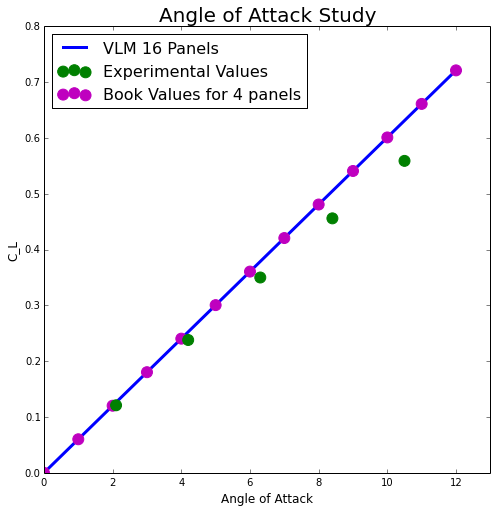

In [19]:
%matplotlib inline
size = 8
plt.figure(figsize=(size,size))
plt.title('Angle of Attack Study', fontsize=20)
plt.xlabel('Angle of Attack', fontsize='12')
plt.ylabel('C_L', fontsize='12')
plt.xlim(0, AoA[-1] + 1)
plt.ylim(0.0, 0.8)
plt.scatter(AoA_exp, C_L_exp, color='g', s=120, label='Experimental Values',\
    zorder=3)
plt.scatter(AoA, C_L_Book, color='m', s=120, label='Book Values for 4 panels',\
    zorder=2)
plt.plot(AoA, C_L, color='b', linestyle='-', linewidth=3,\
    label='VLM 16 Panels', zorder=1)
plt.legend(loc='best', prop={'size':16});

As you can see, overall the VLM method agrees very well with experimental data especially when considering the VLM solution is invisicid!!

## Future Options

That's it for this notebook, but there is much more that you can do with VLM codes. Try to Plot the spanwise distribution of Lift. You could edit my Panel class so that it includes more than one panel in the chordwise direction, or add a boundary layer solution and see if the experimental and numerical data collapse. If you really like VLMs you could take this could and make it 3D.

### References:

Anderson, John D. Fundamentals of Aerodynamics. Boston: McGraw-Hill, 2001. Print.
   
Bertin, John J., and Michael L. Smith. Aerodynamics for Engineers. Englewood Cliffs, NJ: Prentice-Hall, 1979. Print.

Weber, J., and G. G. Brebner, "Low-Speed Tests on 45-deg Swept-Back Wings, Part I: Pressur Measurements on Wings of Aspect Ratio 5," Reports and Memoranda 2882, Aeronautical Research Council, 1958.

Special thanks to Bertin and Smith for their example problem on VLMs in their textbook as their mathematical derivation is extensively used.

###### Notebook Style (ignore below)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./VLM_resources/numericalmoocstyle.css', 'r').read()
    return HTML(styles)
css_styling()